# Machine Learning results for rough nano surfaces. 

#### Here are we are training our ML models to predict the active area based on some popular ISO parameters that characterise the strucural parameres of a surface.

#### We use Linear models, Random forests, Neural Networks and Deep Neural Networks.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import random
warnings.filterwarnings('ignore')
%matplotlib inline

## Data import and decribe

In [2]:
df1 = pd.read_csv("Dataset v1.csv")
heldout=pd.read_csv("heldout.csv")
df2= pd.read_csv("Dataset v2.csv")
df3= pd.read_csv("Dataset v3.csv")
df4= pd.read_csv("Dataset v4.csv")
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import KFold

def mean_relative_absolute_error(y_true, y_pred):
    x=sum(np.abs((y_true - y_pred)) / y_true ) /len(y_true)
    return x

In [3]:
df33=df3[['Rms','clx','cly','Skewness','Kurtosis','Area']]

In [4]:
df33.drop([2891],inplace=True)

y1=df33['Area']
X1=df33[['Rms','clx','cly','Skewness','Kurtosis']]

In [5]:
df33.describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000,3053.000000
mean,0.031818,0.215624,0.214187,0.024124,5.513888,72.456063
std,0.016403,0.088406,0.088364,1.137891,2.306104,8.739961
min,0.004013,0.054494,0.049875,-2.747300,1.497900,64.035000
25%,0.017517,0.139360,0.138540,-0.824070,3.565300,65.887000
50%,0.031769,0.216820,0.213680,0.025149,5.470800,69.877000
75%,0.046358,0.289080,0.287300,0.844740,7.536100,75.456000
max,0.060049,0.465580,0.435600,2.724300,9.560700,117.950000


In [6]:
y1_held=heldout['Area']
X1_held=heldout[['Rms','clx','cly','Skewness','Kurtosis']]

In [7]:
heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000,15288.000000
mean,0.029002,0.210099,0.210005,-0.081806,5.382781,73.232645
std,0.017080,0.100984,0.101117,1.130900,1.975513,10.775388
min,0.003973,0.046519,0.046790,-2.369700,1.488700,64.026000
25%,0.014001,0.115830,0.115950,-0.949342,3.508200,65.359000
50%,0.028975,0.211295,0.210665,-0.054045,5.504200,69.253500
75%,0.044004,0.294695,0.294980,0.798845,7.464000,76.840250
max,0.054360,0.474560,0.500690,2.166300,7.614100,131.250000


# Database overview

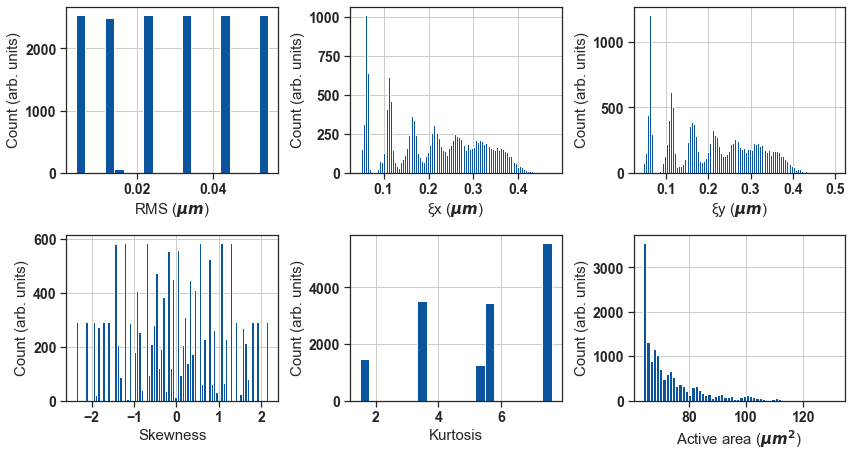

In [79]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 27}

plt.rc('font', **font)
sns.set(style="ticks", palette="Blues_r" )
ax = f.add_subplot(331 )
ax = heldout['Rms'].hist(bins=20)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  heldout['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  heldout['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  heldout['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  heldout['Kurtosis'].hist(bins=20)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  heldout['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
#plt.rc('xtick', labelsize=35) 
#plt.rc('ytick', labelsize=35) 
f.tight_layout()
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=15)
#plt.rcParams['xtick.major.size'] = 20
#plt.rcParams['xtick.major.width'] = 5
#plt.rcParams['ytick.minor.size'] = 20
#plt.rcParams['ytick.minor.width'] = 5

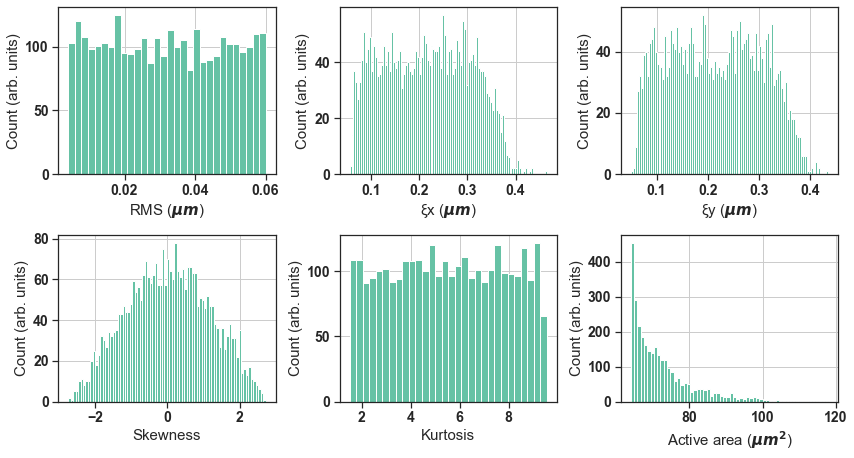

In [80]:
f = plt.figure(figsize=(12,9))
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 40}

plt.rc('font', **font)
sns.set(style="ticks", palette="Set2" )
ax = f.add_subplot(331 )
ax = df33['Rms'].hist(bins=30)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('RMS ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('RMS',fontsize=10)

ax2 = f.add_subplot(332)

ax2 =  df33['clx'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξx ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax3 = f.add_subplot(333)

ax3 =  df33['cly'].hist(bins=100)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('ξy ($μm$)',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax4 = f.add_subplot(334)


ax4 =  df33['Skewness'].hist(bins=80)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Skewness',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax5 = f.add_subplot(335)

ax5 =  df33['Kurtosis'].hist(bins=30)

plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Kurtosis',fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.title('Linear regression (Train size= 610)',fontsize=10)
ax6 = f.add_subplot(336)

ax6 =  df33['Area'].hist(bins=60)
plt.ylabel('Count (arb. units)',fontsize=15)
plt.xlabel('Active area ($μm^2$)',fontsize=15)


#plt.title('Linear regression (Train size= 610)',fontsize=10)
f.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=14)

## Linear Regression

In [8]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(80,81,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5


80


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,80,610,9.553871,0.135651,0.051952,0.001104,0.840674,0.000641


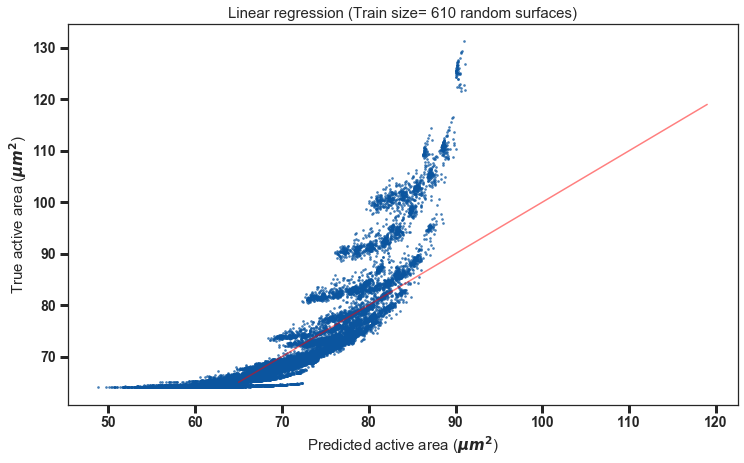

In [24]:
plt.figure(figsize=(12,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610 random surfaces)',fontsize=15)
plt.tick_params(direction='out', length=8, width=3,
                grid_alpha=0.5,labelsize=14)
plt.show()

In [25]:
heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']][heldout['Area']<66].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area
count,4583.000000,4583.000000,4583.000000,4583.000000,4583.000000,4583.000000
mean,0.009453,0.235820,0.235599,-0.061857,5.426702,64.628028
std,0.006738,0.097421,0.097284,1.112552,1.944523,0.594624
min,0.003973,0.048137,0.048002,-2.369700,1.488700,64.026000
25%,0.003999,0.160815,0.160465,-0.946220,3.508850,64.116000
50%,0.004009,0.243680,0.244200,-0.050657,5.507700,64.396000
75%,0.014004,0.316750,0.314925,0.798835,7.466700,65.050000
max,0.034040,0.474560,0.500690,2.164100,7.614100,65.998000


In [26]:
heldout[heldout['Rms']<70]

,N,Sq Length,input clx,GRms,GErrorRms,G clx,G Error clx,G clx.1,G Error clx.1,G Area,...,clx,Error clx,cly,Error cly,Area,Error Area,Skewness,Error Sk,Kurtosis,Error Ku
0,600,8,0.36,1,0,1,0,1,0,1,...,0.11772,0,0.39151,0,77.422,0,0.546830,0,5.5054,0
1,600,8,0.36,1,0,1,0,1,0,1,...,0.17174,0,0.39619,0,69.245,0,-1.340300,0,7.6015,0
2,600,8,0.36,1,0,1,0,1,0,1,...,0.30374,0,0.32638,0,68.007,0,-2.100100,0,7.5139,0
3,600,8,0.31,1,0,1,0,1,0,1,...,0.28806,0,0.34281,0,69.023,0,0.065295,0,5.4356,0
4,600,8,0.21,1,0,1,0,1,0,1,...,0.26290,0,0.23751,0,68.353,0,1.054100,0,5.5544,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,600,8,0.31,1,0,1,0,1,0,1,...,0.16988,0,0.30859,0,64.986,0,0.560990,0,5.4699,0
15284,600,8,0.26,1,0,1,0,1,0,1,...,0.15764,0,0.27470,0,73.834,0,1.542000,0,5.4462,0
15285,600,8,0.21,1,0,1,0,1,0,1,...,0.37629,0,0.21586,0,67.663,0,-0.688780,0,5.4680,0
15286,600,8,0.31,1,0,1,0,1,0,1,...,0.31925,0,0.29810,0,64.039,0,1.052800,0,5.4549,0


In [27]:
from sklearn.cluster import DBSCAN
XY=np.vstack((pre,y1_held.values)).T
db = DBSCAN(eps=0.8, min_samples=7).fit(XY)
#db.labels_ gives an array with labeled clusters as (0,1,2,3...cluster_length) -1 labeled as noise data
core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
#core_samples_mask creates an array same size as db.labels_ but with False in every cell
core_samples_mask[db.core_sample_indices_] = True
#core points are True (noise and reachable points are False) (might want to change that...)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(XY, labels))

Estimated number of clusters: 5


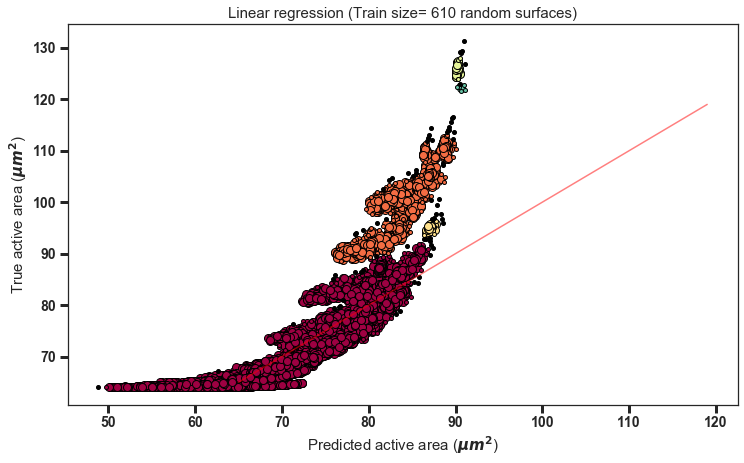

In [28]:
# Black removed and is used for noise instead.
plt.figure(figsize=(12,7))
unique_labels = set(labels) #builds an ordered collection (set) of unique elements
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))] # different pallete of colors in lists example: [(0.66, 0.003, 0.2, 1.
for k, col in zip(unique_labels, colors):
    if k == -1:
        
        col = [0, 0, 0, 1]                                         # Black used for noise.

    class_member_mask = (labels == k)

    xyy = XY[class_member_mask & core_samples_mask]
    
    plt.plot(xyy[:, 0], xyy[:, 1], 'o', markerfacecolor=tuple(col), # large size for the core points
             markeredgecolor='k', markersize=8)

    xyy = XY[class_member_mask & ~core_samples_mask]
    
    plt.plot(xyy[:, 0], xyy[:, 1], 'o', markerfacecolor=tuple(col), # small size for the reachable points
             markeredgecolor='k', markersize=4)

x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610 random surfaces)',fontsize=15)
plt.tick_params(direction='out', length=8, width=3,
                grid_alpha=0.5,labelsize=14)
plt.show()

In [29]:
dfclust=heldout[['Rms','clx','cly','Skewness','Kurtosis','Area']]

In [30]:
dfclust['labels']=db.labels_

In [31]:
dfclust[dfclust['labels']==1].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area,labels
count,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.0
mean,0.048126,0.137666,0.138165,-0.072723,5.438646,98.582076,1.0
std,0.005745,0.100468,0.100012,1.134841,1.934188,6.326756,0.0
min,0.033830,0.046519,0.047715,-2.362600,1.492700,88.493000,1.0
25%,0.043987,0.061993,0.062226,-0.951095,3.511200,92.544000,1.0
50%,0.044112,0.065369,0.065569,-0.051953,5.510200,98.913000,1.0
75%,0.053992,0.210905,0.210815,0.802005,7.464400,102.645000,1.0
max,0.054324,0.392210,0.391280,2.158800,7.613600,113.040000,1.0


In [32]:
dfclust[dfclust['labels']==0].describe()

,Rms,clx,cly,Skewness,Kurtosis,Area,labels
count,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.0
mean,0.026897,0.218254,0.218196,-0.080514,5.387804,70.417936,0.0
std,0.016549,0.097838,0.098027,1.130712,1.971754,6.314665,0.0
min,0.003973,0.046752,0.047043,-2.369700,1.488700,64.027000,0.0
25%,0.013993,0.130305,0.130680,-0.949180,3.508200,65.057500,0.0
50%,0.024022,0.217195,0.216660,-0.053667,5.504300,68.464000,0.0
75%,0.043920,0.300040,0.300083,0.798863,7.464200,73.959750,0.0
max,0.054360,0.474560,0.500690,2.166300,7.614100,91.909000,0.0


In [152]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,99,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5

90
91
92
93
94
95
96
97
98


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,9.501695,0.110847,0.053276,0.001638,0.840088,0.000892
1,91,274,9.542194,0.127271,0.052572,0.001434,0.840410,0.000991
2,92,244,9.646939,0.230486,0.052190,0.001422,0.839654,0.001335
3,93,213,9.582288,0.245697,0.052832,0.001894,0.839078,0.001960
4,94,183,9.553169,0.176668,0.053169,0.001941,0.839390,0.002097
5,95,152,9.730857,0.175981,0.051536,0.001550,0.839047,0.001240
6,96,122,9.702665,0.260386,0.052663,0.002262,0.837958,0.001701
7,97,91,9.785353,0.412162,0.053986,0.002784,0.835087,0.003295
8,98,61,9.846406,0.296979,0.053297,0.003099,0.832953,0.005028


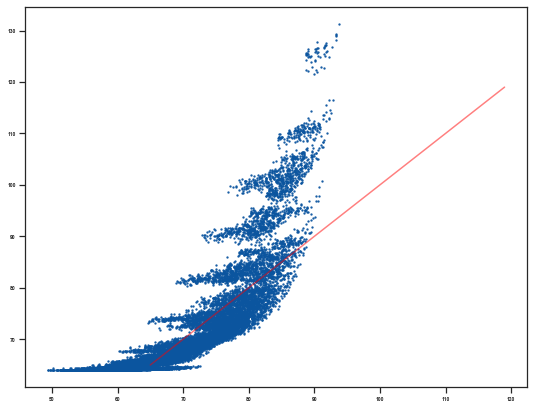

In [153]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.8,s=2)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.show()

error traveler plot

In [9]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_reg1 = pd.DataFrame(lst2, columns=cols)
df_reg1

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,9.515494,0.036372,0.052007,0.000341,0.841354,0.000103
1,40,1831,9.496613,0.042452,0.052140,0.000387,0.841266,0.000234
2,50,1526,9.536285,0.054985,0.051871,0.000529,0.841240,0.000215
3,60,1221,9.493930,0.047245,0.052336,0.000600,0.841125,0.000303
4,70,915,9.517419,0.070550,0.052313,0.000756,0.841103,0.000321
5,80,610,9.540616,0.084175,0.052194,0.000873,0.840705,0.000628
6,90,305,9.595168,0.145550,0.052567,0.001901,0.839801,0.001285
7,92,244,9.602720,0.119763,0.052533,0.001644,0.839995,0.000979
8,94,183,9.540497,0.195277,0.053295,0.001820,0.839666,0.001255
9,96,122,9.651763,0.185476,0.053762,0.002592,0.837808,0.002473


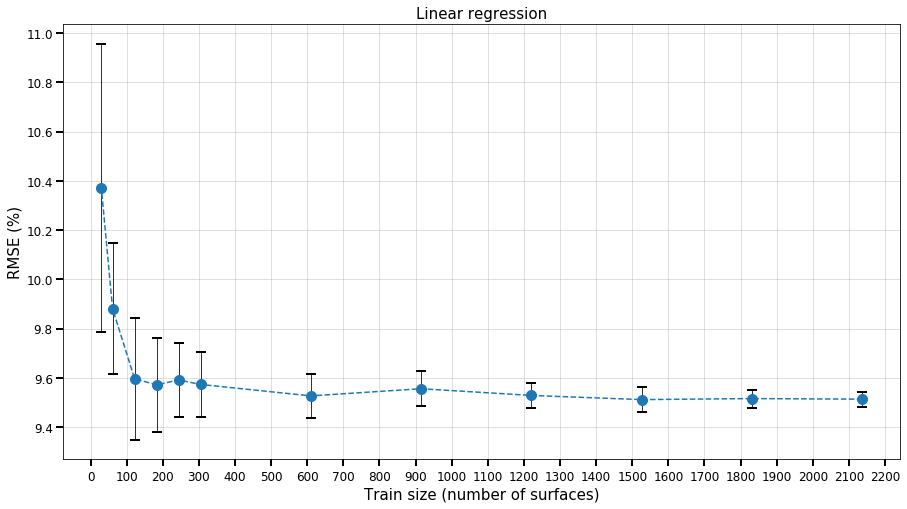

In [23]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10)
#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15,)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 100
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Linear regression',fontsize=15)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)
show()

In [37]:

#xlabels = boston.feature_names[which_betas]
#stats.summary(regr,X_train, y_train, xlabels)
coeff_df = pd.DataFrame(regr.coef_,X_train.columns,columns=['Coefficient'])
coeff_df


,Coefficient
Rms,306.680724
clx,-37.510584
cly,-9.576757
Skewness,0.385070
Kurtosis,0.523318


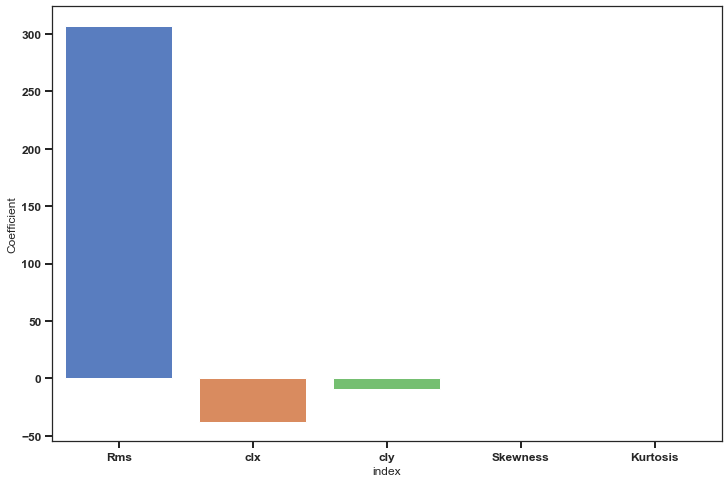

In [64]:
plt.figure(figsize=(12,8))
sns.barplot('index', y='Coefficient', data=coeff_df.reset_index(),palette = 'muted')
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)


In [ ]:
############################################################

In [65]:
#1400 epifaneies
rmse1=[10,4,10.2,8,3.5]
rmse2=[10.2,10.4,36,35.5,3.6]
models=['Linear Regresion','Random Forests','Simple NN','Complex NN','Deep NN']


In [66]:
df1_ = pd.DataFrame(rmse1,models,columns=['RMSE(%)'])
df1_

df2_ = pd.DataFrame(rmse2,models,columns=['RMSE(%)'])
df2_

,RMSE(%)
Linear Regresion,10.2
Random Forests,10.4
Simple NN,36.0
Complex NN,35.5
Deep NN,3.6


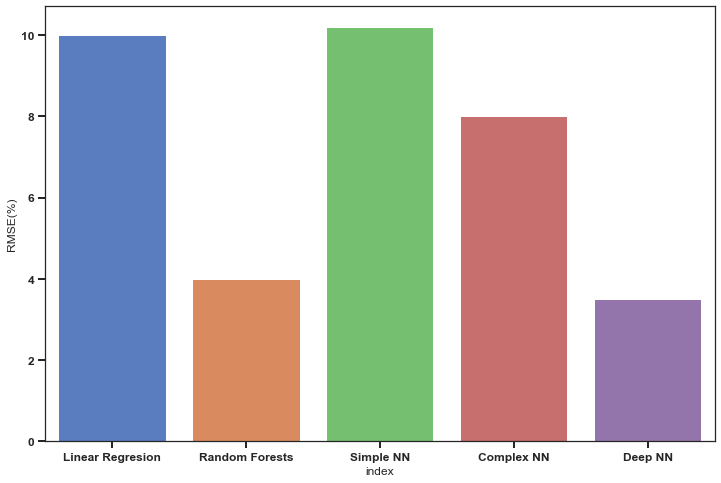

In [67]:
plt.figure(figsize=(12,8))
sns.barplot('index', y='RMSE(%)', data=df1_.reset_index(),palette = 'muted')
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)


In [68]:
############################################################

In [24]:
from sklearn import linear_model
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = linear_model.LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=1)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_reg2 = pd.DataFrame(lst2, columns=cols)
df_reg2

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,9.545797,0.145521,0.052507,0.001128,0.840149,0.001076
1,91,274,9.649778,0.137395,0.051695,0.001300,0.839742,0.001164
2,92,244,9.582676,0.193688,0.052166,0.001515,0.839960,0.000756
3,93,213,9.608314,0.154473,0.052711,0.002270,0.839424,0.001526
4,94,183,9.600980,0.267970,0.052793,0.002082,0.839370,0.001258
5,95,152,9.609028,0.215927,0.052328,0.001678,0.839096,0.001554
6,96,122,9.739237,0.232423,0.053380,0.002829,0.836886,0.003575
7,97,91,9.692875,0.279993,0.054358,0.002930,0.836559,0.003073
8,98,61,10.056945,0.415575,0.055218,0.004885,0.830207,0.009005
9,99,30,10.397209,0.785562,0.058013,0.008060,0.814168,0.028822


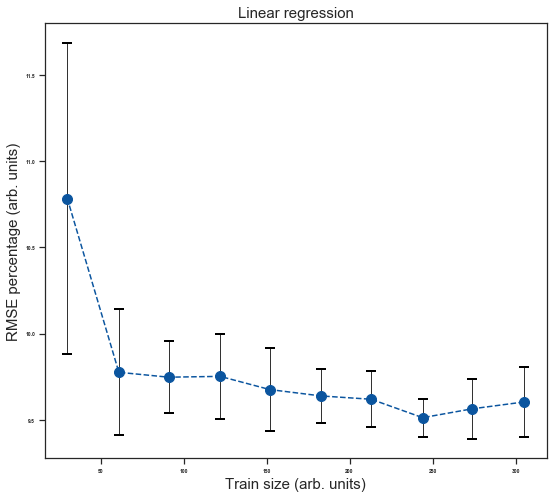

In [70]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg2['Train_size'],df_reg2['mean_Final_RMSE'], yerr=df_reg2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10)
#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 50
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Linear regression',fontsize=15)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
show()

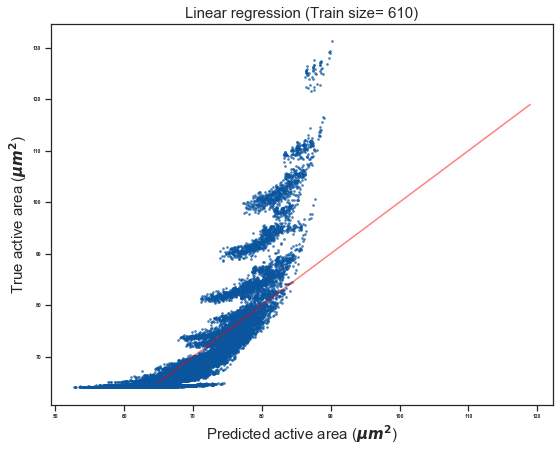

In [71]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Linear regression (Train size= 610)',fontsize=15)
plt.show()

## Neural Networks

In [ ]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1),np.std(lst1),np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_new5 = pd.DataFrame(lst2, columns=cols)
df_new5

90


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=14)
lpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu',max_iter=300)
mlpred.fit(X_train, y_train)
pre= mlpred.predict(X1_held)
print(len(X_train))
np.sqrt(metrics.mean_squared_error(y1_held, pre))

1526


2.229552013236616

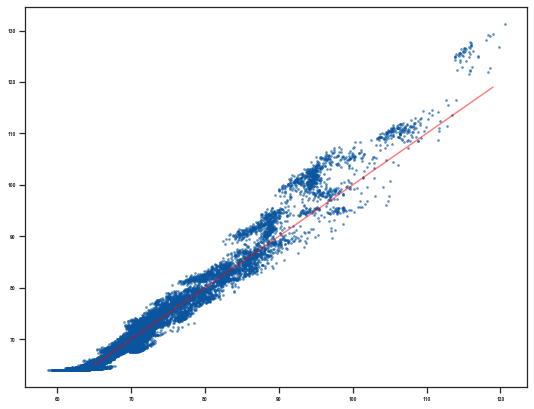

In [74]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.5,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.show()

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1,5,10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1
5
10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,3.518881,0.081406,0.013133,0.000314,0.985087,0.000844
1,5,2900,3.563831,0.143459,0.013404,0.000471,0.984841,0.001086
2,10,2747,3.625581,0.147958,0.013652,0.000517,0.983907,0.001041
3,20,2442,3.692782,0.190863,0.013946,0.000600,0.983312,0.001320
4,30,2137,3.918890,0.235325,0.014871,0.000866,0.980996,0.001561
5,40,1831,4.101251,0.228062,0.015707,0.000739,0.978472,0.002113
6,50,1526,4.269740,0.235869,0.016725,0.000841,0.976469,0.002419
7,60,1221,4.831203,0.313090,0.018585,0.000966,0.971560,0.003028
8,70,915,5.211529,0.287281,0.020275,0.000888,0.965110,0.003496
9,80,610,6.019669,0.352707,0.023629,0.001288,0.954131,0.006130


In [28]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [1]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=14,min_samples_leaf=8,random_state=0,n_estimators=25)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for1 = pd.DataFrame(lst2, columns=cols)
df_for1

1


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,1,3022,3.441226,0.097106,0.012848,0.000324,0.985667,0.000621


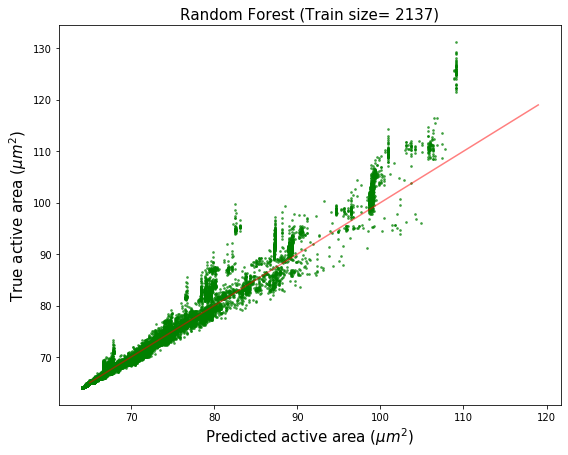

In [29]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 2137)',fontsize=15)
plt.show()

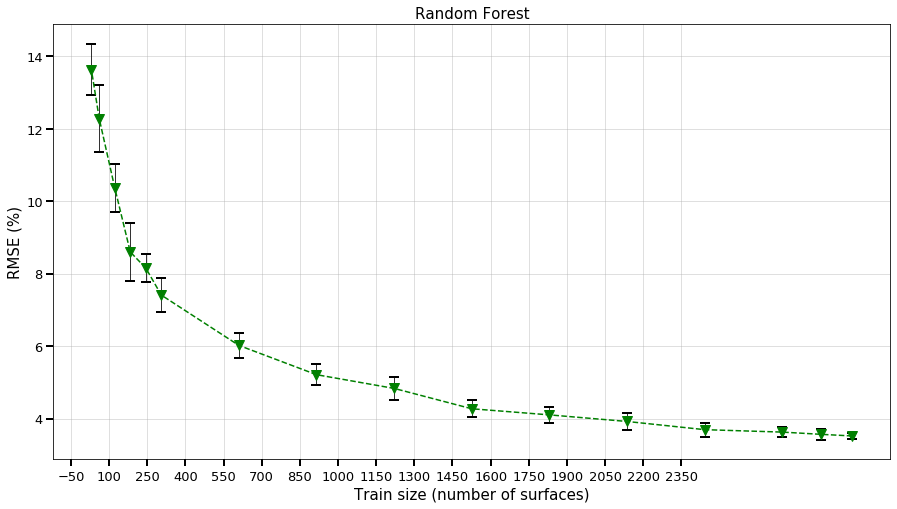

In [32]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker


# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green')
#ax1.legend(['mean_RMSE_percentage'],loc=2)
#ax1.legend_.remove()
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.errorbar(df_new5 ['Train_size'],df_new5 ['mean_relative_absolute_error'], yerr=df_new5 ['std_mean_relative_absolute_error'],ecolor='black',fmt='xr-',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax2.legend(["mean_rel_absolute_error"],loc=1)
#ylabel('mean_rel_absolute_error')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Random Forest',fontsize=15)


plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

plt.xticks(np.arange(-50, 2400, 150))
show()

In [156]:
from sklearn.ensemble import RandomForestRegressor
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        regr = RandomForestRegressor(max_depth=9,min_samples_leaf=3,random_state=0)
        regr.fit(X_train, y_train)
        pre= regr.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_for2 = pd.DataFrame(lst2, columns=cols)
df_for2

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,5.882617,0.447075,0.022989,0.001198,0.960983,0.005941
1,91,274,6.297579,0.698441,0.024520,0.001899,0.952957,0.010021
2,92,244,6.350964,0.597752,0.025099,0.001702,0.951734,0.009135
3,93,213,6.855002,0.538487,0.027028,0.001711,0.943010,0.008954
4,94,183,6.837769,0.796304,0.027545,0.002336,0.942356,0.011872
5,95,152,7.183162,0.728883,0.029765,0.001962,0.936649,0.013644
6,96,122,7.882395,0.955276,0.032792,0.002677,0.924018,0.018612
7,97,91,8.903307,0.910434,0.037858,0.002169,0.895198,0.024499
8,98,61,9.547944,0.875950,0.043377,0.003447,0.870866,0.035145
9,99,30,11.795968,0.886106,0.057553,0.004335,0.758476,0.050413


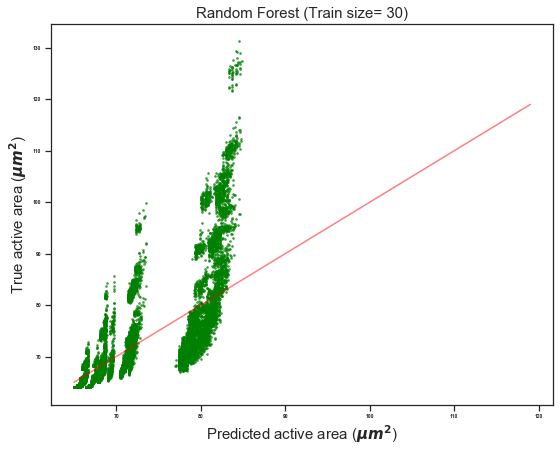

In [83]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3,color='green')
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Random Forest (Train size= 30)',fontsize=15)
plt.show()

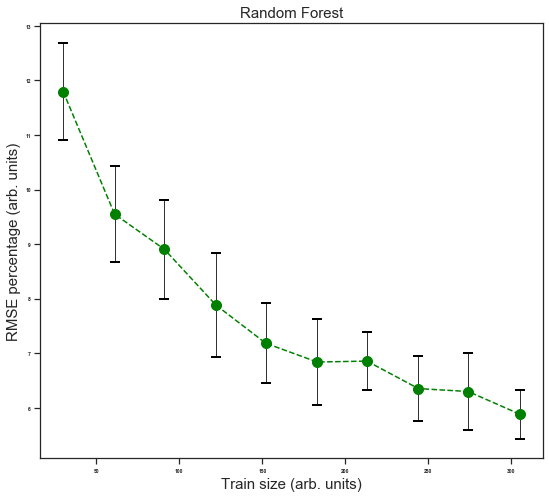

In [157]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)
line1 = ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green')
#ax1.legend(['mean_RMSE_percentage'],loc=2)

ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#line2 = ax2.errorbar(df_new5 ['Train_size'],df_new5 ['mean_relative_absolute_error'], yerr=df_new5 ['std_mean_relative_absolute_error'],ecolor='black',fmt='xr-',capthick=2)
#ax2.yaxis.tick_right()
tick_spacing =50
#ax2.yaxis.set_label_position("right")
#ax2.legend(["mean_rel_absolute_error"],loc=1)
#ylabel('mean_rel_absolute_error')
plt.title('Random Forest',fontsize=15)


ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
show()

## Random forest vs Linear Regression

NameError: name 'ticker' is not defined

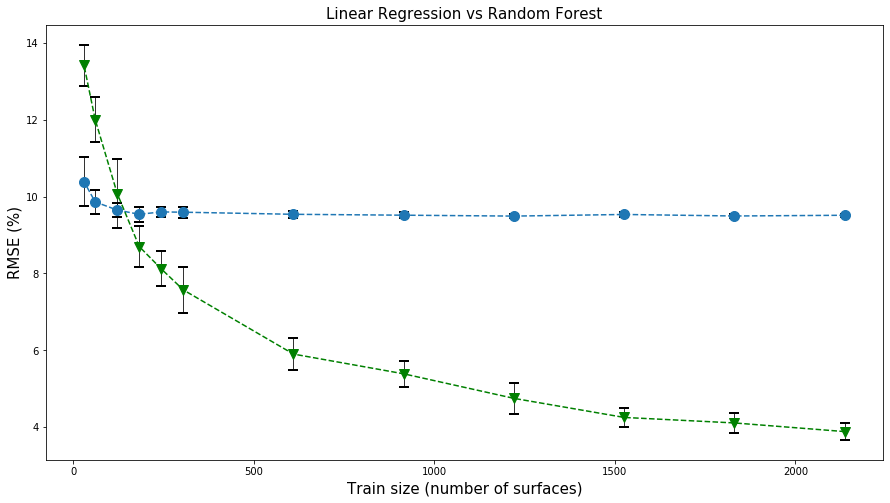

In [11]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest',fontsize=15)

tick_spacing =100
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

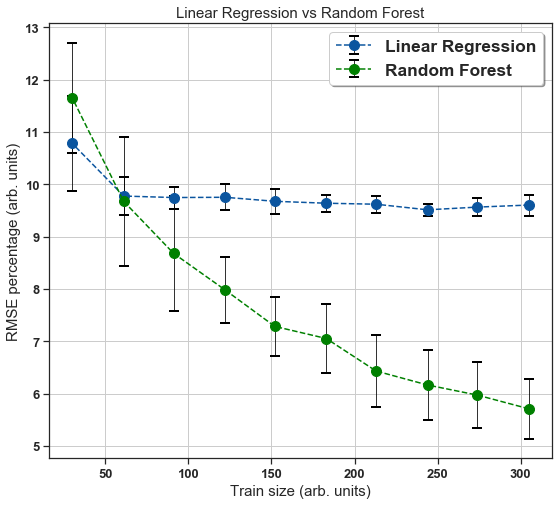

In [90]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg2['Train_size'],df_reg2['mean_Final_RMSE'], yerr=df_reg2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest',fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=13)
tick_spacing =50
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

## Neural network

In [12]:
# more complicated neural net!
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in [30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_net3 = pd.DataFrame(lst2, columns=cols)
df_net3

30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,30,2137,5.819012,1.528346,0.030692,0.007353,0.948328,0.022604
1,40,1831,5.895831,1.518273,0.030001,0.006803,0.944982,0.021548
2,50,1526,6.024584,1.186745,0.029526,0.005273,0.943784,0.019218
3,60,1221,6.165873,1.172710,0.031950,0.006666,0.941342,0.020383
4,70,915,7.149627,0.597262,0.037420,0.004155,0.924227,0.006532
5,80,610,7.520129,0.699539,0.040681,0.004483,0.913594,0.010056
6,90,305,9.740586,0.715201,0.051716,0.005237,0.840005,0.027660
7,92,244,11.210282,0.773050,0.061473,0.004739,0.778377,0.027587
8,94,183,12.208021,0.382859,0.067984,0.003277,0.730561,0.022912
9,96,122,14.983013,1.153137,0.085873,0.007611,0.533569,0.215252


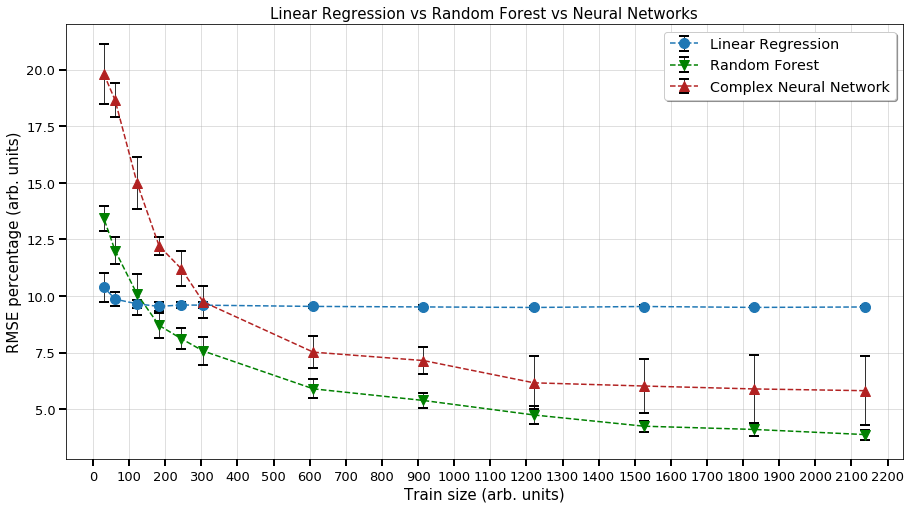

In [13]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'],df_net1['mean_Final_RMSE'], yerr=df_net1['std_final_rmse'],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 100

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
plt.grid(True) 
show()

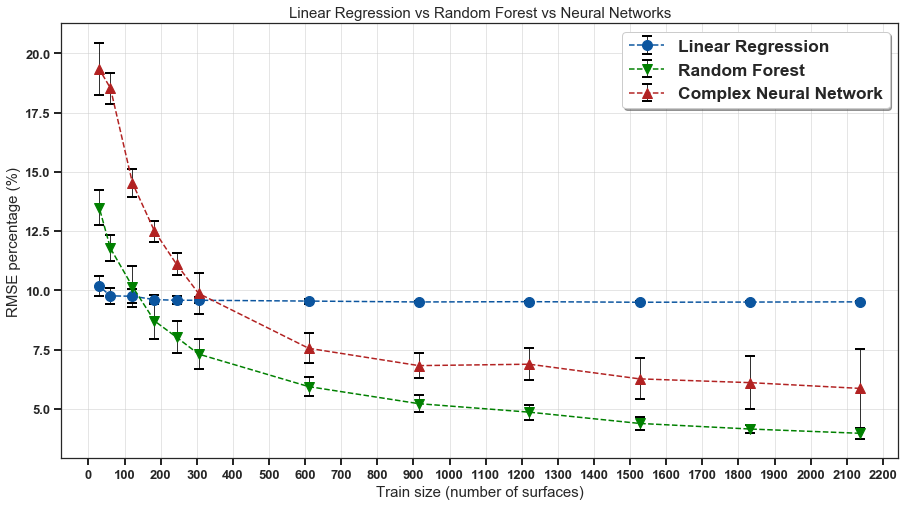

In [162]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 100

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
plt.grid(True) 
show()

In [163]:
# more complicated neural net!
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_relative_absolute_error','std_mean_relative_absolute_error','pears','std_pears']
lst2=[]

for test_s in range(90,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,21,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        mlpred=MLPRegressor(random_state=25,hidden_layer_sizes=(15,25,40,25,15),batch_size=20,activation='relu')
        mlpred.fit(X_train, y_train)
        pre= mlpred.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        lst11.append([mean_relative_absolute_error(y1_held, pre)])
        lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst11),np.std(lst11),np.mean(lst111),np.std(lst111)])
df_net4 = pd.DataFrame(lst2, columns=cols)
df_net4

90
91
92
93
94
95
96
97
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_relative_absolute_error,std_mean_relative_absolute_error,pears,std_pears
0,90,305,9.838998,0.688743,0.051898,0.005883,0.837662,0.027937
1,91,274,10.377080,0.672920,0.056356,0.006257,0.816393,0.028609
2,92,244,10.944543,0.641672,0.059993,0.004453,0.791768,0.030163
3,93,213,11.625078,0.955761,0.064226,0.005287,0.765312,0.024225
4,94,183,12.438505,0.621782,0.067339,0.004740,0.740742,0.024659
5,95,152,12.618379,0.409514,0.069168,0.003605,0.717913,0.022532
6,96,122,15.165233,1.122737,0.082496,0.007658,0.553193,0.240369
7,97,91,14.972269,0.669726,0.085114,0.005119,0.569634,0.085761
8,98,61,18.497861,0.700931,0.104859,0.008196,-0.152249,0.080851
9,99,30,19.941713,1.143146,0.114668,0.007513,-0.204452,0.060658


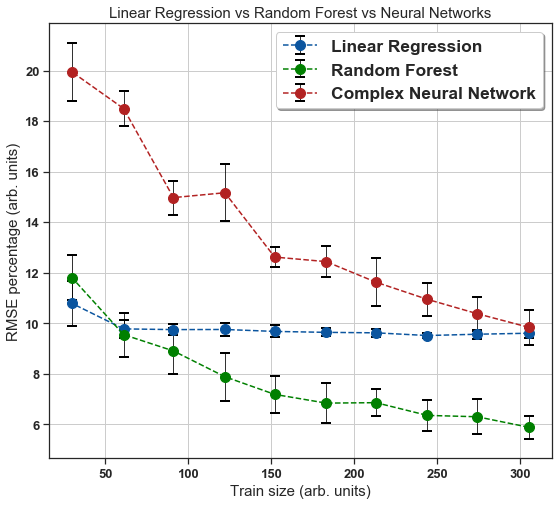

In [164]:
from pylab import figure, show, legend, ylabel
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg2['Train_size'],df_reg2['mean_Final_RMSE'], yerr=df_reg2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for2 ['Train_size'],df_for2 ['mean_Final_RMSE'], yerr=df_for2 ['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net2['Train_size'],df_net2['mean_Final_RMSE'], yerr=df_net2['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net4['Train_size'],df_net4['mean_Final_RMSE'], yerr=df_net4['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Complex Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

tick_spacing =50
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.tick_params(axis='both', which='major', labelsize=13)
legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')

#ax1.set_yscale("log", nonposy='clip')
plt.grid(True)
show()

# Deep Neural Network

In [14]:
import keras
from keras.layers import *

In [168]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [70,80,90,92,94,96,98,99,99.5]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

70
80
90
92
94
96
98
99
99.5


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,3.363420,1.305292,2.412939,0.839104
1,80.0,610,3.284616,0.565132,2.486858,0.482483
2,90.0,305,3.645668,2.384730,2.683675,1.718034
3,92.0,244,3.255630,0.779145,2.396986,0.598674
4,94.0,183,2.575183,0.687343,1.814815,0.465709
5,96.0,122,2.769328,0.243204,1.854594,0.088270
6,98.0,61,3.388381,1.426659,2.357885,0.908454
7,99.0,30,2.635859,0.366161,1.956840,0.491433
8,99.5,15,3.116972,0.422492,2.406877,0.450068


In [173]:
plt.figure(figsize=(9,7))
df_net5

,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,3.363420,1.305292,2.412939,0.839104
1,80.0,610,3.284616,0.565132,2.486858,0.482483
2,90.0,305,3.645668,2.384730,2.683675,1.718034
3,92.0,244,3.255630,0.779145,2.396986,0.598674
4,94.0,183,2.575183,0.687343,1.814815,0.465709
5,96.0,122,2.769328,0.243204,1.854594,0.088270
6,98.0,61,3.388381,1.426659,2.357885,0.908454
7,99.0,30,2.635859,0.366161,1.956840,0.491433
8,99.5,15,3.116972,0.422492,2.406877,0.450068


In [ ]:
train_error = []

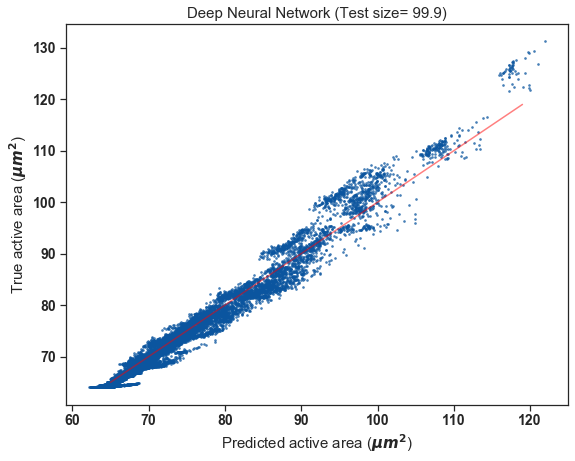

In [191]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 99.9)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [33]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [1,5,10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

1
5
10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,1,3022,3.402778,1.266269,2.440581,0.923902
1,5,2900,3.301215,1.108315,2.335835,0.819709
2,10,2747,3.060047,0.585516,2.161267,0.431564
3,20,2442,4.763102,1.742225,3.213013,1.072939
4,30,2137,3.680843,1.259725,2.517917,0.822541
5,40,1831,3.812266,1.206837,3.155938,1.371148
6,50,1526,5.054008,1.641874,3.214943,0.961674
7,60,1221,5.761788,1.893726,3.997221,1.293608
8,70,915,7.382709,1.772203,5.146403,0.968620
9,80,610,7.272099,2.402085,5.454052,2.129772


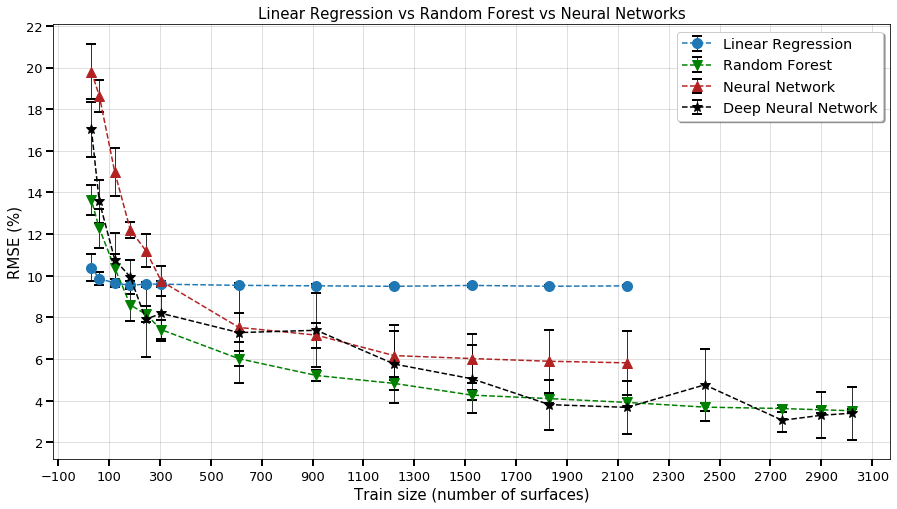

In [39]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(-100, 3200, 200))
#ax1.set_yscale("log", nonposy='clip')
show()

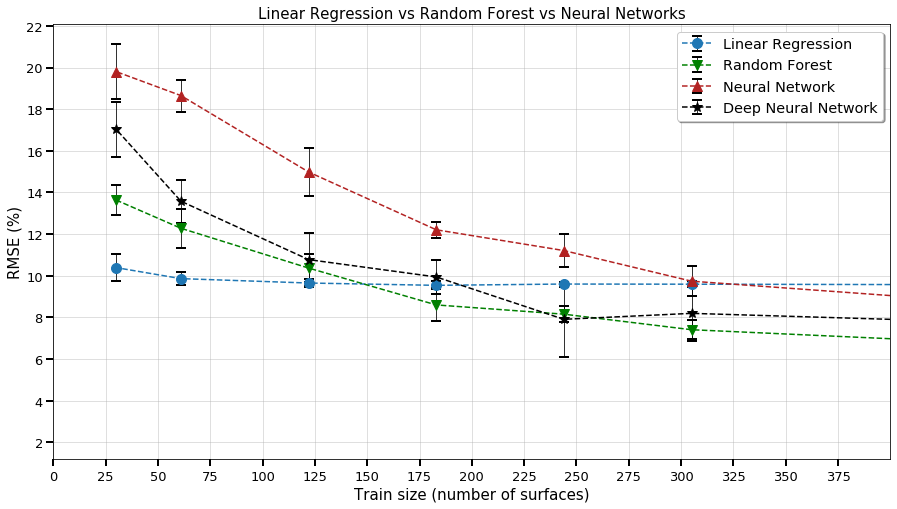

In [49]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(0, 400, 25))
plt.xlim(0, 400)
#ax1.set_yscale("log", nonposy='clip')
show()

In [50]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [10,20,30,40,50,60,70,80,90,92,94,96,98,99]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(200))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(200))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

10
20
30
40
50
60
70
80
90
92
94
96
98
99


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,10,2747,2.646031,0.583102,1.984501,0.503766
1,20,2442,2.967273,0.554407,2.356162,0.734702
2,30,2137,3.022868,0.569683,2.299647,0.531961
3,40,1831,3.443071,1.002928,2.601242,0.710295
4,50,1526,4.148933,1.434084,2.806511,0.934935
5,60,1221,4.479361,1.829885,3.192867,1.204843
6,70,915,4.641277,1.541455,3.247634,1.098822
7,80,610,7.638078,2.480643,5.904296,1.895486
8,90,305,7.851751,2.154661,5.181689,1.579153
9,92,244,10.156490,1.147489,7.549814,0.482656


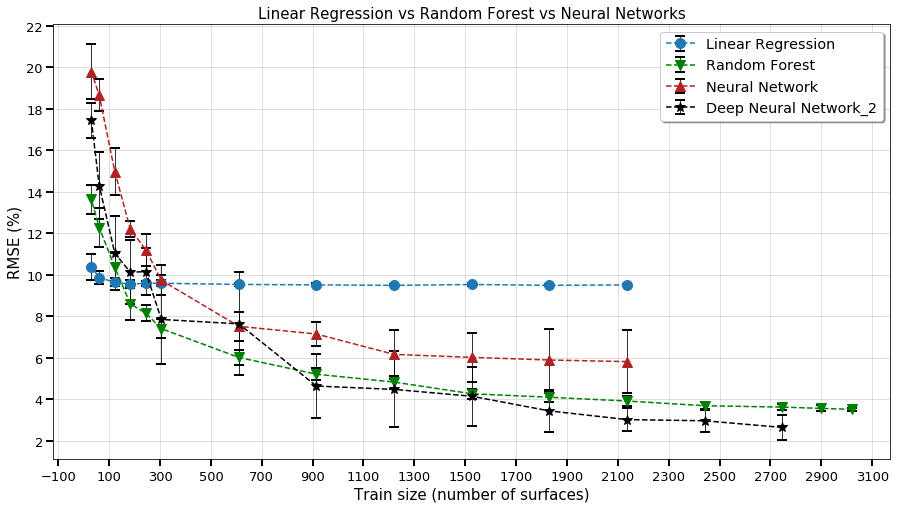

In [51]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(15,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_reg1['Train_size'],df_reg1['mean_Final_RMSE'], yerr=df_reg1['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,label='Linear Regression')
#ax1.legend(['neural network RMSE'],loc=2)

# now, the second axes that shares the x-axis with the ax1

#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
ax1.errorbar(df_for1 ['Train_size'],df_for1 ['mean_Final_RMSE'], yerr=df_for1 ['std_final_rmse'],ecolor='black',fmt='--v',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='green',label='Random Forest')
#ax1.errorbar(df_net1['Train_size'][:-1],df_net1['mean_Final_RMSE'][:-1], yerr=df_net1['std_final_rmse'][:-1],ecolor='black',fmt='--D',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='red',label='Simple Neural Network')
ax1.errorbar(df_net3['Train_size'],df_net3['mean_Final_RMSE'], yerr=df_net3['std_final_rmse'],ecolor='black',fmt='--^',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='firebrick',label='Neural Network')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--*',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label='Deep Neural Network_2')
#ax1.legend(['neural network RMSE'],loc=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
ylabel('RMSE (%)',fontsize=15)
plt.xlabel('Train size (number of surfaces)',fontsize=15)
plt.title('Linear Regression vs Random Forest vs Neural Networks',fontsize=15)

plt.grid(True)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)

legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.tick_spacing = 200

ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#ax1.set_yscale("log", nonposy='clip')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.grid(True) 
plt.xticks(np.arange(-100, 3200, 200))
#ax1.set_yscale("log", nonposy='clip')
show()

In [57]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in  [10]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,2,1):
        rand=random.randint(5, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(200))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(200))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X_train, y_train,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X_train)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y_train, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

10


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,10,2747,1.991997,0.0,1.339864,0.0


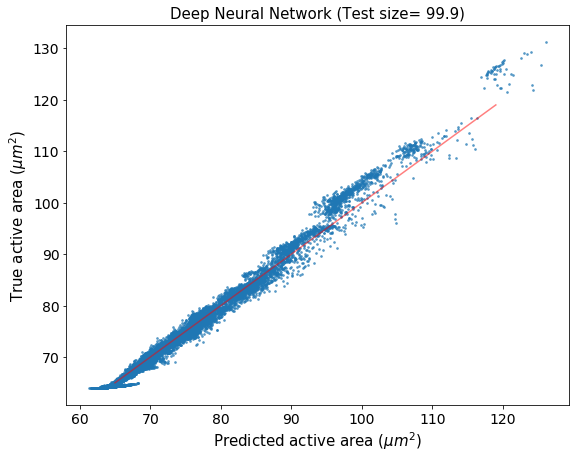

In [58]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 99.9)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

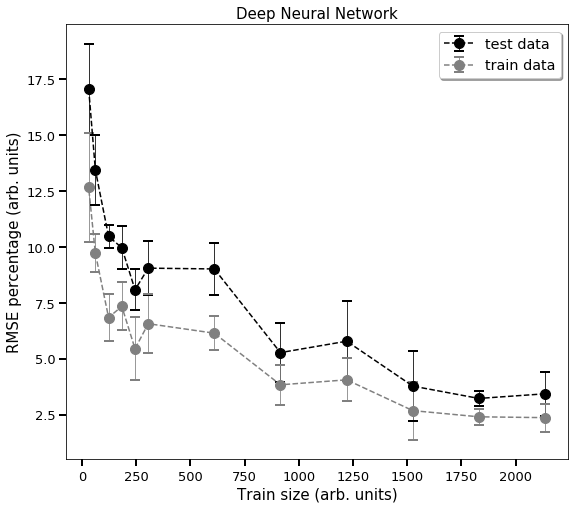

In [19]:
from pylab import figure, show, legend, ylabel
import matplotlib.ticker as ticker
# create the general figure
fig1 = figure(figsize=(9,8))
# and the first axes using subplot populated with data 
ax1 = fig1.add_subplot(111)

ax1.errorbar(df_net5['Train_size'],df_net5['mean_Final_RMSE'], yerr=df_net5['std_final_rmse'],ecolor='black',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='black',label = 'test data')
ax1.errorbar(df_net5['Train_size'],df_net5['mean_train_RMSE'], yerr=df_net5['std_train_rmse'],ecolor='grey',fmt='--o',capthick=2,capsize=5,elinewidth=0.8, markersize=10,color='grey',label = 'train data')

#ax1.legend(['neural network RMSE'],loc=2)
ylabel('RMSE percentage (arb. units)',fontsize=15)
plt.xlabel('Train size (arb. units)',fontsize=15)
# now, the second axes that shares the x-axis with the ax1
tick_spacing = 250
legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
#ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
#ax1.errorbar(df_new5['Train_size'] ,df_new5 ['mean_Final_RMSE'], yerr=df_new5 ['std_final_rmse'],ecolor='black',fmt='xr-',label='linear regression RMSE',capthick=2)
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")
#ax1.legend(["liner regression RMSE"],loc=1)
#ylabel('liner regression RMSE')
plt.title('Deep Neural Network',fontsize=15)
ax1.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=13)
#legend = ax1.legend(loc='down center', shadow=True, fontsize='x-large')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
show()

In [184]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [70,80,90,92,94,96,98,99,99.5]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,8,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=400,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net6 = pd.DataFrame(lst2, columns=cols)
df_net6

70
80
90
92
94
96
98
99
99.5


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,70.0,915,4.652070,1.646264,3.314887,1.296062
1,80.0,610,4.576186,0.957780,3.411923,1.044073
2,90.0,305,5.807881,2.334498,4.082600,1.428725
3,92.0,244,4.666332,1.530155,3.754790,1.373162
4,94.0,183,5.723275,2.918403,4.084791,2.078803
5,96.0,122,5.133385,1.779492,3.278604,1.096280
6,98.0,61,4.176850,1.200975,3.545742,1.493207
7,99.0,30,4.889426,1.587472,3.629572,1.311660
8,99.5,15,4.488142,2.032087,3.683982,1.497210


In [15]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse']
lst2=[]

for test_s in range(99,100,1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(9,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100])
df_net6 = pd.DataFrame(lst2, columns=cols)
df_net6

99


KeyboardInterrupt: 

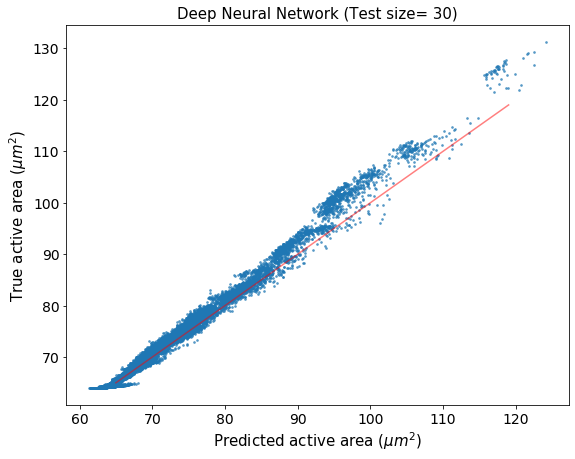

In [12]:
plt.figure(figsize=(9,7))
plt.scatter(pre,y1_held,alpha=0.6,s=3)
x = np.arange(65, 120)
plt.plot(x,x,'r',alpha=0.5)
plt.ylabel('True active area ($μm^2$)',fontsize=15)
plt.xlabel('Predicted active area ($μm^2$)',fontsize=15)
plt.title('Deep Neural Network (Test size= 30)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [9]:
X_train

,Rms,clx,cly,Skewness,Kurtosis
2714,0.057543,0.302120,0.203230,0.200360,8.4999
2585,0.018508,0.303990,0.217700,-1.275900,8.1981
2857,0.052136,0.089591,0.224330,-1.290000,4.1584
2653,0.033374,0.297890,0.094151,1.338600,4.7180
2598,0.044109,0.095482,0.235060,0.422580,6.6046
1228,0.010952,0.103280,0.189370,-0.356170,1.5778
2304,0.048995,0.249770,0.370060,1.749100,6.6322
2640,0.008374,0.110960,0.142200,-0.983560,4.4238
2610,0.015703,0.265620,0.193590,0.026861,1.9998
2684,0.050408,0.190150,0.365810,-0.397240,5.4708


In [10]:
y_train

2714    75.567
2585    65.274
2857    88.722
2653    74.197
2598    82.133
1228    65.615
2304    70.765
2640    64.945
2610    65.238
2684    73.356
141     69.771
2966    73.768
1070    68.519
2973    70.694
274     73.828
1459    68.474
1338    81.504
686     74.775
641     64.327
1460    84.735
298     78.103
2969    64.139
2176    69.218
217     65.909
2972    91.225
2789    70.338
1736    68.440
2217    72.723
1734    64.449
1523    65.809
Name: Area, dtype: float64

In [8]:
df_net6

,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse
0,94,183,3.355574,1.733773


In [16]:
cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse','mean_train_RMSE','std_train_rmse']
lst2=[]

for test_s in [99,99.2,99.4,99.6,99.8,99.9]:
    lst11=[]
    lst1 = []
    lst111=[]
    lst3 = []
    print(test_s)
    for i in range(1,10,1):
        rand=random.randint(1, 10000)
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        pre_train =  net1Model.predict(X1)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
        
        lst3.append([np.sqrt(metrics.mean_squared_error(y1, pre_train))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100,np.mean(lst3)/64*100,np.std(lst3)/64*100])
df_net5 = pd.DataFrame(lst2, columns=cols)
df_net5

99
99.2
99.4
99.6
99.8
99.9


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse,mean_train_RMSE,std_train_rmse
0,99.0,30,4.163429,1.842635,2.986160,1.181539
1,99.2,24,3.537621,1.357604,2.693368,0.766774
2,99.4,18,3.872095,1.806104,2.834036,1.056222
3,99.6,12,2.983534,0.748196,2.507293,0.897502
4,99.8,6,4.425235,2.829533,3.209138,1.995616
5,99.9,3,2.975951,1.283965,2.212552,1.019897


In [113]:

#TESTING FAILURE OF DEEP NEURAL NETWORK

cols = ['test_percentage','Train_size','mean_Final_RMSE','std_final_rmse']
lst2=[]
rand=0
for test_s in range(90,99.9,0.1):
    lst11=[]
    lst1 = []
    lst111=[]
    print(test_s)
    for i in range(1,1,1):
        rand= rand+1
        
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_s/100 ,random_state=rand)
        
        net1Model=keras.models.Sequential()
        net1Model.add(Dense(10,input_shape=(5,)))
        net1Model.add(Activation('relu'))
        net1Model.add(Dense(100))
        net1Model.add(Dropout(0.5))
        net1Model.add(Dense(100))
        net1Model.add(GaussianNoise(1.0))
        net1Model.add(Dense(1))
        net1Model.compile(optimizer='rmsprop',
              loss='mse')
        net1Model.fit(X1, y1,epochs=1000,verbose=0)
        
        
        
        pre= net1Model.predict(X1_held)
        
        lst1.append([np.sqrt(metrics.mean_squared_error(y1_held, pre))])
       # lst11.append([mean_relative_absolute_error(y1_held, pre)])
       # lst111.append([  np.corrcoef(y1_held, pre)[0, 1]])
    lst2.append([test_s,len(X_train),np.mean(lst1)/64*100,np.std(lst1)/64*100])
df_net7 = pd.DataFrame(lst2, columns=cols)
df_net7

94


,test_percentage,Train_size,mean_Final_RMSE,std_final_rmse
0,94,610,NaN,NaN


In [119]:
for layer in net1Model.layers:
    weights = layer.get_weights()

In [120]:
coeff_df=pd.DataFrame(net1Model.layers[0].get_weights()[0])

In [121]:
coeff_df

,0,1,2,3,4,5,6,7,8,9
0,4.479012,-0.500201,4.451200,-0.553584,4.302739,5.688436,4.608456,-5.604764,-4.885773,0.428184
1,-2.471640,-0.578177,0.097956,-0.572158,-1.064451,-0.455851,-0.012258,-0.118495,0.052921,-0.440652
2,0.066363,0.532960,-2.512512,0.630504,-0.024093,-0.503108,-1.214421,-0.113857,-0.027813,-1.104923
3,-0.000081,0.387494,-0.004728,-0.320880,0.000179,0.045730,0.003064,0.070354,-0.013780,0.452181
4,-0.000510,-0.330988,-0.002620,-0.491774,-0.001279,0.125366,0.000303,0.226015,0.017242,-0.046460


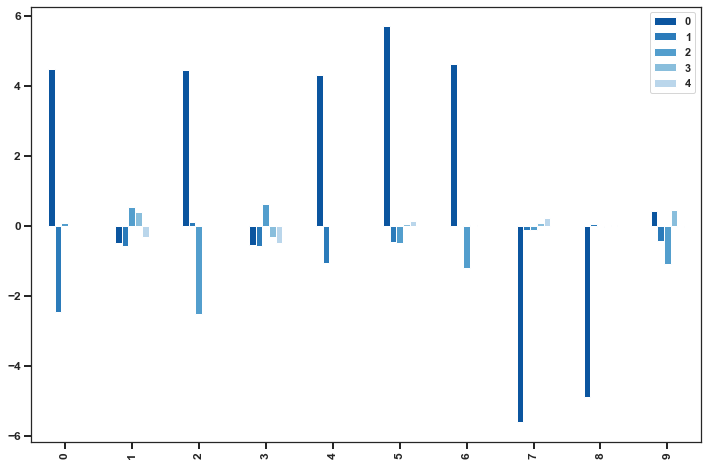

In [122]:
#df11=pd.DataFrame(coeff_df)
#df22=df11.transpose()
plt.Figure(figsize=(12,3))
coeff_df.transpose().plot.bar(figsize=(12,8))
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)

In [123]:
coeff_df.transpose().apply(abs).mean()

0    3.550235
1    0.586456
2    0.673055
3    0.129847
4    0.124256
dtype: float32

In [124]:
r=[10,-1.5,-1.6,0.2,0.4]
r_df=pd.DataFrame(r,["Rms","ξx",'ξy','Skewness','Kurtosis'])

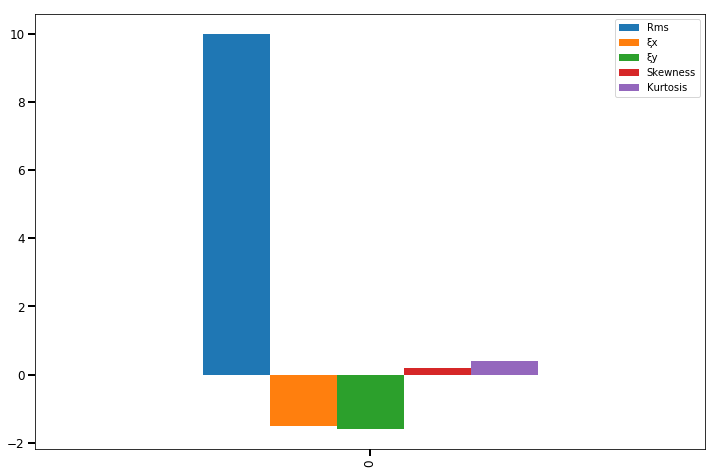

In [34]:
#df11=pd.DataFrame(coeff_df)
#df22=df11.transpose()
plt.Figure(figsize=(12,3))
r_df.transpose().plot.bar(figsize=(12,8))
plt.tick_params(direction='out', length=7, width=2,
                grid_alpha=0.5,labelsize=12)